In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\anjum\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
print("Features: ", cancer.feature_names)
# label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

In [5]:
classifier = RandomForestClassifier()

In [6]:
parameters = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

In [7]:
R_S_CV = RandomizedSearchCV(classifier, param_distributions=parameters, cv=5, n_iter=50, n_jobs=-1, random_state=42)
R_S_CV.fit(X_train, y_train)
RSCV_parameters = R_S_CV.best_params_
print("Best Hyperparameters:", RSCV_parameters)

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}


In [8]:
classifier = RandomForestClassifier(n_estimators=RSCV_parameters['n_estimators'],
                                    max_depth=RSCV_parameters['max_depth'],
                                    min_samples_split=RSCV_parameters['min_samples_split'],
                                    min_samples_leaf=RSCV_parameters['min_samples_leaf'])
classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

In [9]:
cross_val_accuracy = cross_val_score(classifier, X_train, y_train, cv=5)

In [10]:
print(cross_val_accuracy)
print("Mean :", np.mean(cross_val_accuracy))

[0.95604396 0.94505495 0.95604396 0.95604396 0.94505495]
Mean : 0.9516483516483516


In [11]:
y_pred = classifier.predict(X_test)

In [12]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [13]:
Sensitivity = tp / (tp + fn)
Specificity = tn / (tn + fp)

In [14]:
print("Final Performance on Test Dataset:")
print("Sensitivity (Recall):", Sensitivity)
print("Specificity:", Specificity)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Final Performance on Test Dataset:
Sensitivity (Recall): 0.9859154929577465
Specificity: 0.9302325581395349
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[40  3]
 [ 1 70]]


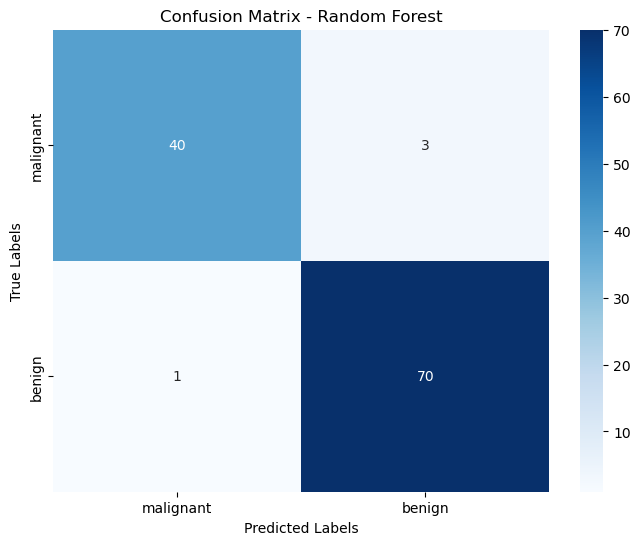

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


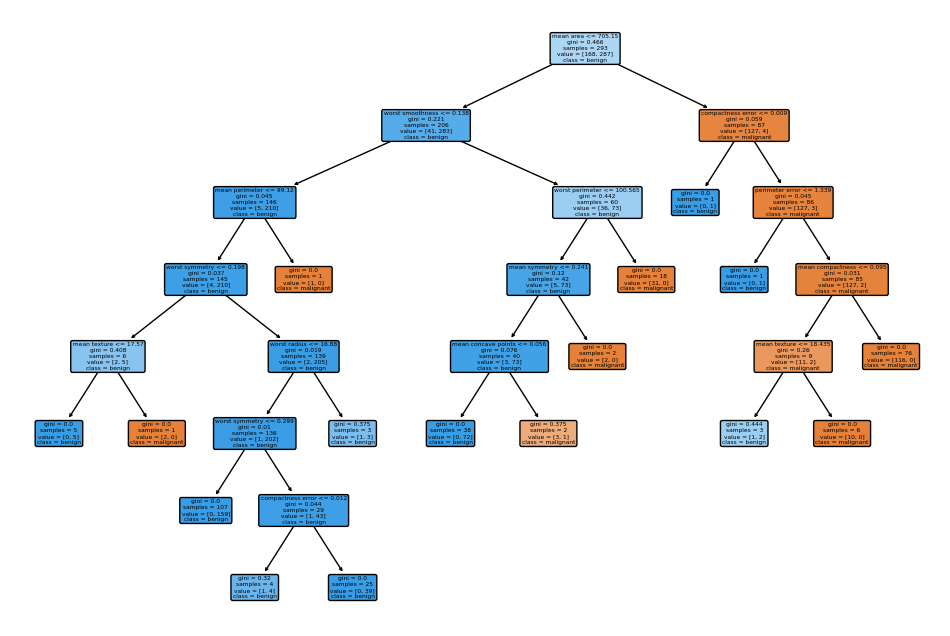

In [16]:
first_tree = classifier.estimators_[0]
plt.figure(figsize=(12, 8))
plot_tree(first_tree, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names, rounded=True)
plt.show()
